In [1]:
# 导入最基本的数据处理工具
# import numpy as np # 导入NumPy数学计算工具包
import pandas as pd # 导入Pandas数据处理工具包

In [2]:
df_ads = pd.read_csv('易速鲜花微信软文.csv') # 读入数据
# df_ads.astype(int)
df_ads.head(10) # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


In [3]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [4]:
# df_ads['转发数'].fillna(df_ads['转发数'].mean(), inplace=True) # 用均值补值

In [5]:
df_ads = df_ads.dropna() # 删除NaN值
df_ads.isna().sum()

点赞数     0
转发数     0
热度指数    0
文章评级    0
浏览量     0
dtype: int64

In [6]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib – Python画图工具库
import seaborn as sns #Seaborn – 统计学数据可视化工具库

#### 遇到字体问题

需要复制系统字体库里的到安装路径下。即从`C:\Windows\Fonts`-->`C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf`下，具体路径可通过代码查看

```
import matplotlib
matplotlib.matplotlib_fname()
```

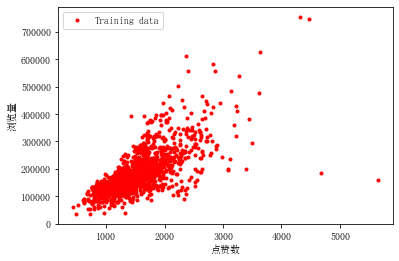

In [7]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

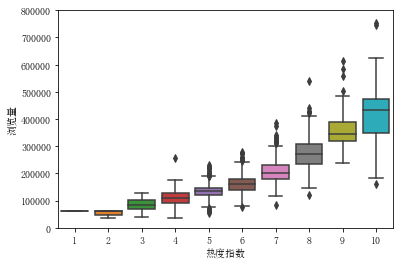

In [8]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

## 构建特征集和标签集

In [9]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉便签相关字段
y = df_ads.浏览量 # 标签集

In [10]:
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [11]:
y.head() # 显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

## 数据集拆分（8/2比例分割训练集和验证集）

In [12]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=10)

In [13]:
X_train

,点赞数,转发数,热度指数,文章评级
742,2169,1284.0,8,5
759,2229,755.0,6,6
1249,1792,963.0,7,5
1181,2521,942.0,6,4
1203,2515,2035.0,6,3
...,...,...,...,...
1430,1555,1373.0,7,5
1381,2030,848.0,6,6
541,1152,1092.0,6,8
1180,1052,1052.0,5,5


## 3.选择算法并建立模型

In [14]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
model = LinearRegression(normalize=True) # 使用线性回归算法创建模型；使用默认参数；暂不需要调参

## 4.训练模型

In [15]:
model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定参数

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [16]:
y_pred = model.predict(X_test) #预测测试集的Y值；模型训练之后，可以用（测试集x_test）来预测y_pred
# y_pred

In [20]:
df_ads_pred = X_test.copy() #测试集特征数据
df_ads_pred['浏览量真值'] = y_test #测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred #测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
150,1768,884.0,7,5,224904,204326.495272
36,988,988.0,5,5,113001,117182.827329
1049,2062,1157.0,7,5,277002,236266.050505
393,1392,1392.0,5,6,121502,166316.290479
1255,1537,1319.0,6,9,174002,206254.835807
...,...,...,...,...,...,...
497,1913,896.0,6,6,177004,189916.572692
644,1500,1356.0,7,5,246582,218800.099624
38,1258,1258.0,7,5,172504,200171.838771
943,438,290.0,2,5,60004,-32628.683687


In [21]:
print('当前模型的4个特征的权重分别是: ', model.coef_)
print('当前模型的截距（偏置）是: ', model.intercept_)

当前模型的4个特征的权重分别是:  [   52.4893649     60.46769946 26245.3020327   3498.80914868]
当前模型的截距（偏置）是:  -143139.30816557


In [22]:
print("线性回归预测集评分：", model.score(X_test, y_test)) #评估模型
print("线性回归训练集评分：", model.score(X_train, y_train)) #训练集评分

线性回归预测集评分： 0.418936509530741
线性回归训练集评分： 0.782616812974409


可以看出`normalize=True`对预测值没有影响；对模型权重，评分都没有影响